In [5]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress

In [87]:
data = "Resources/cleaned_used_car_data.csv"
zipcode_data = "Resources/Zip_Locale_Detail.csv"

# Read CSV file and store in Pandas DataFrame
cleaned_df = pd.read_csv(data)
zip_df = pd.read_csv(zipcode_data)

# Show df
cleaned_df.head()


,Unnamed: 0,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
0,2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD
1,3,80773,11600,2019,7852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD
2,4,64287,44000,2019,7728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD
3,7,5250,70000,2019,7627,6500,Land Rover,Defender,1997,NaN,4.0 Liter Fuel Injected V8,NaN,0,4WD
4,8,29023,1330,2019,7043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD


The mean sale price of used cars on ebay in 2019 and 2020 is 10267.407047563805
The median sale price of used cars on ebay in 2019 and 2020 is 6390.0


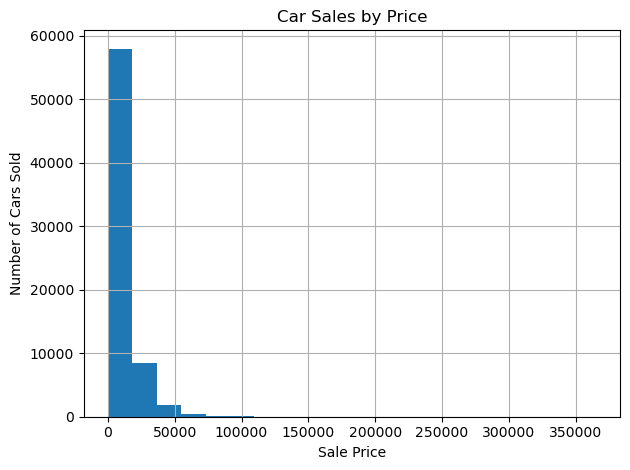

In [111]:
#Created histogram for price sold of all car data. Found mean and median for all car data.

cleaned_df["pricesold"].hist(bins=20)
plt.xlabel("Sale Price")
plt.ylabel("Number of Cars Sold")
plt.title("Car Sales by Price")
mean_numpy=np.mean(cleaned_df["pricesold"])
print(f"The mean sale price of used cars on ebay in 2019 and 2020 is {mean_numpy}")
median_numpy = np.median(cleaned_df["pricesold"])
print(f"The median sale price of used cars on ebay in 2019 and 2020 is {median_numpy}")
plt.savefig("images/all_hist.png")

The lower quartile of price is: 2900.0
The upper quartile of price is: 13450.0
The interquartile range of price is: 10550.0
The the median of price is: 6390.0 
Values below -12925.0 could be outliers.
Values above 29275.0 could be outliers.


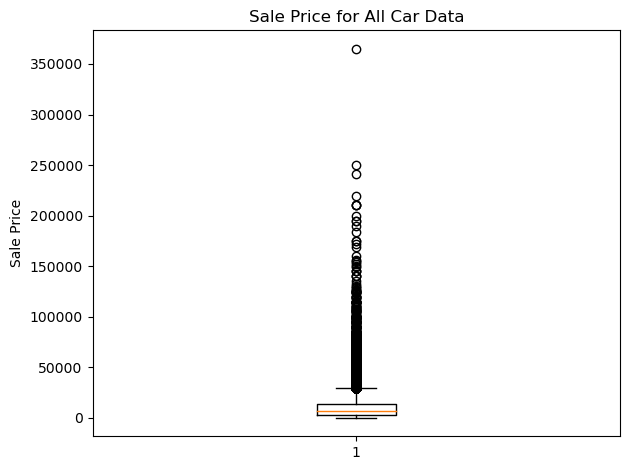

In [112]:
#Create histogram for all car sold data
quartiles= (cleaned_df["pricesold"]).quantile([.25, .5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1=plt.subplots()
ax1.boxplot(cleaned_df["pricesold"])
plt.ylabel("Sale Price")
plt.title("Sale Price for All Car Data")
plt.savefig("images/all_bw.png")

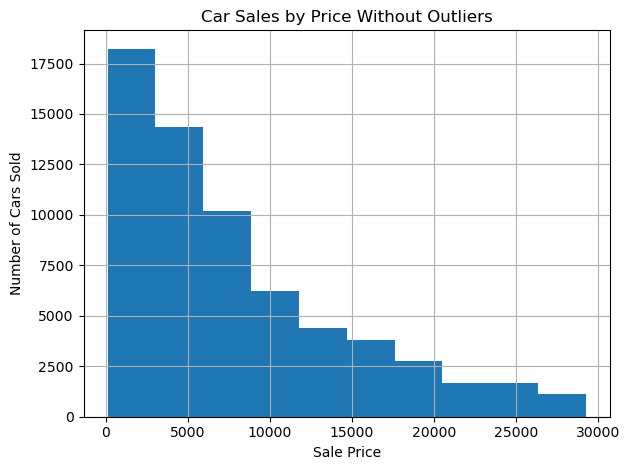

In [119]:
less_than_10df=pd.DataFrame(cleaned_df.loc[cleaned_df["pricesold"]<29275])
less_than_10df["pricesold"].hist(bins=10)
plt.xlabel("Sale Price")
plt.ylabel("Number of Cars Sold")
plt.title("Car Sales by Price Without Outliers")
plt.savefig("images/refined_hist.png")

COMPARE SALE PRICE AMONG MAKES

In [30]:
#Create box and whisker chart based on make

make_list = list(cleaned_df["Make"].unique())
# Create empty list to fill with tumor vol data (for plotting)
car_price_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for make in make_list:    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    car_price = cleaned_df.loc[cleaned_df["Make"] == make, 'pricesold'] 
    
    # add subset 
    car_price_data.append(car_price)    
    
    # Determine outliers using upper and lower bounds   
    quartiles=car_price.quantile([.25, .5, .75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr= upperq-lowerq    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers = car_price.loc[(car_price < lower_bound) | (car_price > upper_bound)]

    print(f"{make}'s potential outliers: {outliers.count()}")
    print(f"{make}'s' lower quartile of price is: {lowerq}")
    print(f"{make}'s upper quartile of price is: {upperq}")
    print(f"{make} interquartile range of price is: {iqr}")
    print(f"{make}'s' median sale price is: {quartiles[0.5]} ")
    print("--------------------------------------------------")

    #lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

Jaguar's potential outliers: 91
Jaguar's' lower quartile of price is: 2405.0
Jaguar's upper quartile of price is: 10500.0
Jaguar's' interquartile range of price is: 8095.0
Jaguar's' median sale price is: 5100.0 
--------------------------------------------------
Ford's potential outliers: 754
Ford's' lower quartile of price is: 3150.0
Ford's upper quartile of price is: 14000.0
Ford's' interquartile range of price is: 10850.0
Ford's' median sale price is: 6890.0 
--------------------------------------------------
Porsche's potential outliers: 74
Porsche's' lower quartile of price is: 6422.5
Porsche's upper quartile of price is: 31370.0
Porsche's' interquartile range of price is: 24947.5
Porsche's' median sale price is: 16000.0 
--------------------------------------------------
Land Rover's potential outliers: 41
Land Rover's' lower quartile of price is: 4000.0
Land Rover's upper quartile of price is: 20200.0
Land Rover's' interquartile range of price is: 16200.0
Land Rover's' median sa

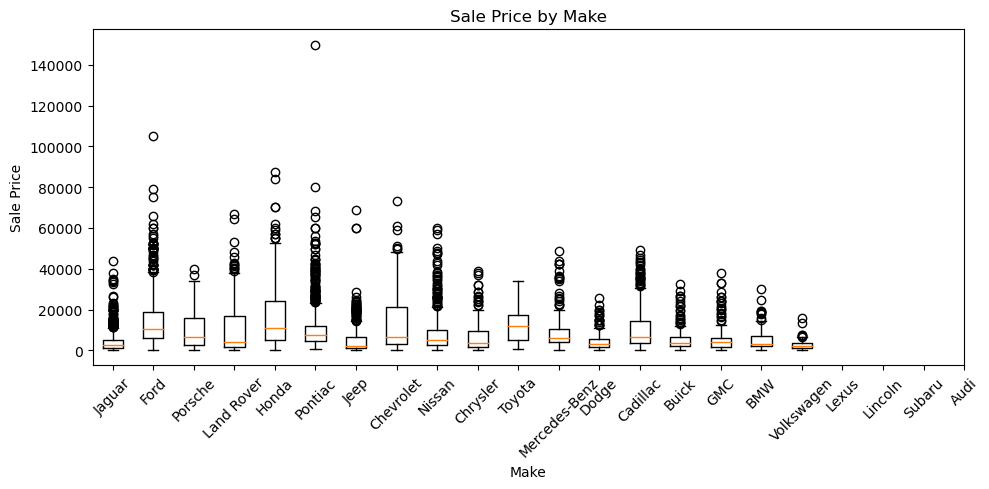

<Figure size 640x480 with 0 Axes>

In [114]:
fig6,ax1=plt.subplots(figsize=(10,5))
ax1.boxplot(car_price_data)
plt.show
ax1.set_xlabel("Make")
ax1.set_ylabel("Sale Price")
x= np.arange(1,23)
plt.xticks(x, list(cleaned_df["Make"].unique()), rotation=45)


plt.title("Sale Price by Make")


plt.show()
plt.savefig("images/price_by_make_bw.png")

COMPARE SALE PRICE OF 18 DESIRED MODELS

In [65]:
#Create data frame using only desired models

model_df= pd.DataFrame(cleaned_df.loc[(cleaned_df["Model"] == "A4")
                                     |(cleaned_df["Model"] == "300 Series")
                                     |(cleaned_df["Model"] == "Charger")
                                     |(cleaned_df["Model"] == "Sierra 1500")
                                     |(cleaned_df["Model"] == "Yukon")
                                     |(cleaned_df["Model"] == "Civic")
                                     |(cleaned_df["Model"] == "Accord")
                                     |(cleaned_df["Model"] == "Odyssey")
                                     |(cleaned_df["Model"] == "Wrangler")
                                     |(cleaned_df["Model"] == "Grand Cherokee")
                                     |(cleaned_df["Model"] == "RX")
                                     |(cleaned_df["Model"] == "SL-Class")
                                     |(cleaned_df["Model"] == "E-Class")
                                     |(cleaned_df["Model"] == "Forester")
                                     |(cleaned_df["Model"] == "Outback")
                                     |(cleaned_df["Model"] == "Legacy")
                                     |(cleaned_df["Model"] == "Impreza")
                                     |(cleaned_df["Model"] == "WRX")
                                      
                                     ])
                      
model_df.head()

,Unnamed: 0,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType
4,8,29023,1330,2019,7043,167000,Honda,Civic,2001,EX,NaN,Coupe,4,FWD
6,11,72418,14100,2019,7014,109500,Jeep,Wrangler,2012,Unlimited,3.6L,SUV,6,4WD
12,24,45651,5390,2019,7840,134000,Chrysler,300 Series,2009,NaN,5.7L HEMI,NaN,8,AWD
17,33,84279,3400,2019,60542,182000,Jeep,Grand Cherokee,2005,NaN,5.7 liter 8 Cylinder Hemi,SUV,8,4WD
23,44,55855,49810,2019,13039,2640,Dodge,Charger,2016,SRT Hellcat,6.2L Supercharged,Sedan,8,RWD


In [69]:
#Create box and whisker for desired models

model_list = list(model_df["Model"].unique())
# Create empty list to fill with tumor vol data (for plotting)
car_price_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for model in model_list:    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    car_price = model_df.loc[model_df["Model"] == model, 'pricesold'] 
    
    # add subset 
    car_price_data.append(car_price)    
    
    # Determine outliers using upper and lower bounds   
    quartiles=car_price.quantile([.25, .5, .75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr= upperq-lowerq    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers = car_price.loc[(car_price < lower_bound) | (car_price > upper_bound)]

    print(f"{model}'s potential outliers: {outliers.count()}")
    print(f"{model}'s' lower quartile of price is: {lowerq}")
    print(f"{model}'s upper quartile of price is: {upperq}")
    print(f"{model} interquartile range of price is: {iqr}")
    print(f"{model}'s' median sale price is: {quartiles[0.5]} ")
    print("--------------------------------------------------")

    #lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")

Civic's potential outliers: 68
Civic's' lower quartile of price is: 1050.0
Civic's upper quartile of price is: 5100.0
Civic interquartile range of price is: 4050.0
Civic's' median sale price is: 2450.0 
--------------------------------------------------
Wrangler's potential outliers: 46
Wrangler's' lower quartile of price is: 6050.0
Wrangler's upper quartile of price is: 18995.0
Wrangler interquartile range of price is: 12945.0
Wrangler's' median sale price is: 10600.0 
--------------------------------------------------
300 Series's potential outliers: 2
300 Series's' lower quartile of price is: 2500.0
300 Series's upper quartile of price is: 15715.0
300 Series interquartile range of price is: 13215.0
300 Series's' median sale price is: 6350.0 
--------------------------------------------------
Grand Cherokee's potential outliers: 13
Grand Cherokee's' lower quartile of price is: 1845.0
Grand Cherokee's upper quartile of price is: 16600.0
Grand Cherokee interquartile range of price is: 

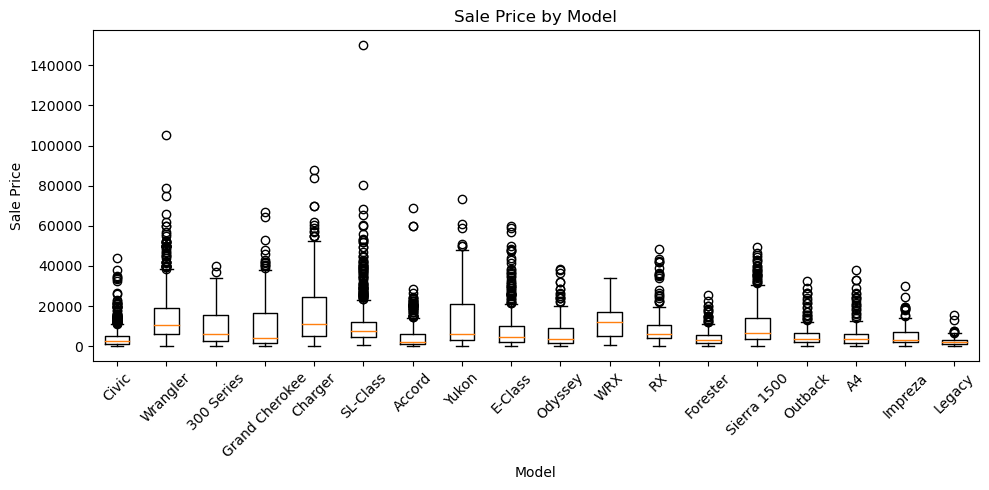

<Figure size 640x480 with 0 Axes>

In [115]:
fig6,ax1=plt.subplots(figsize=(10,5))
ax1.boxplot(car_price_data)
plt.show
ax1.set_xlabel("Model")
ax1.set_ylabel("Sale Price")
x= np.arange(1,19)
plt.xticks(x, list(model_df["Model"].unique()), rotation=45)


plt.title("Sale Price by Model")


plt.show()
plt.savefig("images/price_by_model_bw.png")

COMPARE MOST COMMON SALE PRICE OF THREE MAKES OF CIVIC

In [75]:

civic_df= pd.DataFrame(cleaned_df.loc[cleaned_df["Model"] == "Civic"])

The mean sale price of Civics on ebay in 2019 and 2020 is 4323.352353780314
The median sale price of Civics on ebay in 2019 and 2020 is 2450.0


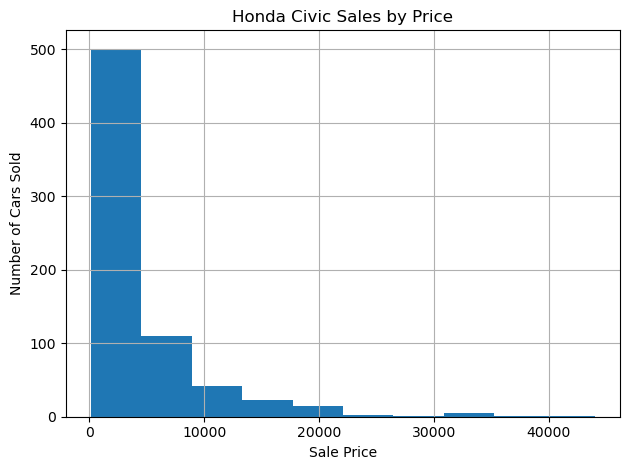

In [116]:
civic_df["pricesold"].hist(bins=10)
mean_numpy=np.mean(civic_df["pricesold"])
print(f"The mean sale price of Civics on ebay in 2019 and 2020 is {mean_numpy}")
median_numpy = np.median(civic_df["pricesold"])
print(f"The median sale price of Civics on ebay in 2019 and 2020 is {median_numpy}")
plt.xlabel("Sale Price")
plt.ylabel("Number of Cars Sold")
plt.title("Honda Civic Sales by Price")
plt.savefig("images/honda_civic_hist.png")


In [81]:
accord_df= pd.DataFrame(cleaned_df.loc[cleaned_df["Model"] == "Accord"])

The mean sale price of Accords on ebay in 2019 and 2020 is 4850.625978090767
The median sale price of Accords on ebay in 2019 and 2020 is 2320.0


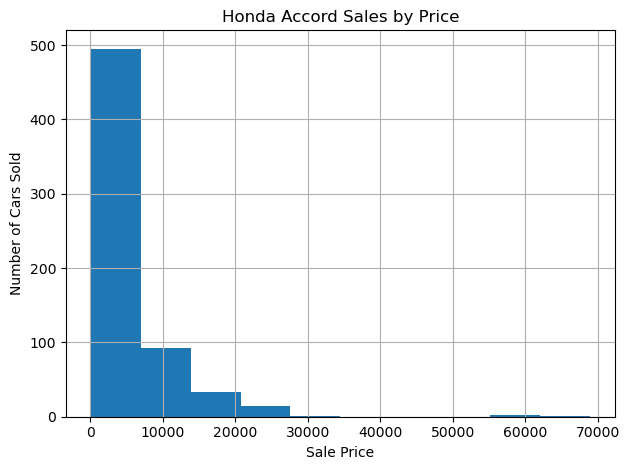

In [117]:
accord_df["pricesold"].hist(bins=10)
mean_numpy=np.mean(accord_df["pricesold"])
print(f"The mean sale price of Accords on ebay in 2019 and 2020 is {mean_numpy}")
median_numpy = np.median(accord_df["pricesold"])
print(f"The median sale price of Accords on ebay in 2019 and 2020 is {median_numpy}")
plt.xlabel("Sale Price")
plt.ylabel("Number of Cars Sold")
plt.title("Honda Accord Sales by Price")
plt.savefig("images/honda_accord_hist.png")

In [83]:
odyssey_df= pd.DataFrame(cleaned_df.loc[cleaned_df["Model"] == "Odyssey"])

The mean sale price of Odysseys on ebay in 2019 and 2020 is 6670.555555555556
The median sale price of Odysseyss on ebay in 2019 and 2020 is 3780.0


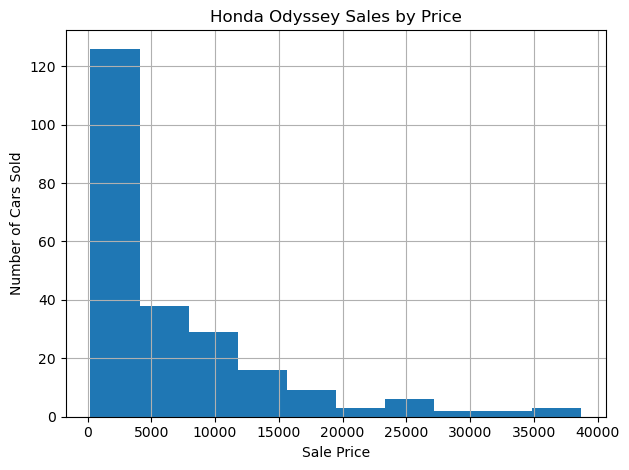

In [118]:
odyssey_df["pricesold"].hist(bins=10)
mean_numpy=np.mean(odyssey_df["pricesold"])
print(f"The mean sale price of Odysseys on ebay in 2019 and 2020 is {mean_numpy}")
median_numpy = np.median(odyssey_df["pricesold"])
print(f"The median sale price of Odysseyss on ebay in 2019 and 2020 is {median_numpy}")
plt.xlabel("Sale Price")
plt.ylabel("Number of Cars Sold")
plt.title("Honda Odyssey Sales by Price")
plt.savefig("images/honda_odyssey_hist.png")